# Getting Started with matplotlib

- Python 2D plotting library which produces figures in many formats and interactive environments.
- Tries to make easy things easy and hard things possible. 
- You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. 
- Check the [Matplotlib gallery](https://matplotlib.org/gallery.html).
- For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with IPython. 
- Matplotlib provides a set of functions familiar to MATLAB users.

```bash
conda install matplotlib
```
*In this notebook we use some numpy command that will be explain more precisely later.*

# Line Plots
 - `np.linspace(- 3*np.pi,3*np.pi,100)` return 100 evenly spaced values over $[-3\pi,3\pi]$.

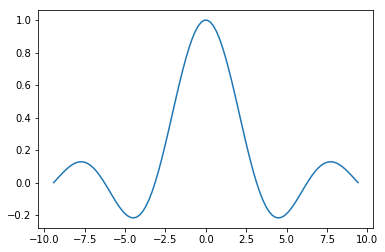

In [1]:
%matplotlib inline 
# Show up your plots inline and import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(- 3*np.pi,3*np.pi,100) 
plt.plot(x,np.sin(x)/x)


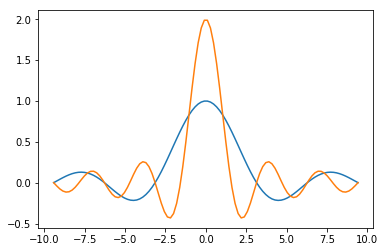

In [2]:
plt.plot(x,np.sin(x)/x,x,np.sin(2*x)/x)

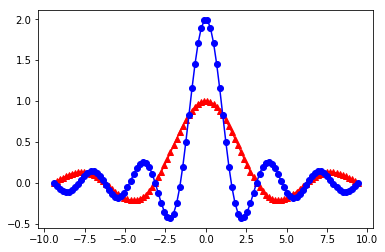

In [3]:
# red, dot-dash, triangles and blue, dot-dash, bullet
plt.plot(x,np.sin(x)/x, 'r-^',x,np.sin(2*x)/x, 'b-o')

# Simple Scatter Plot

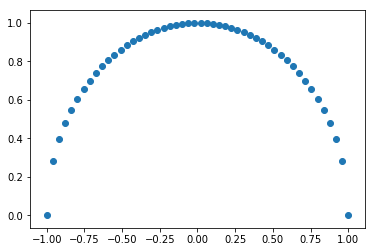

In [4]:
x = np.linspace(-1,1,50)
y = np.sqrt(1-x**2)
plt.scatter(x,y)

# Colormapped Scatter Plot

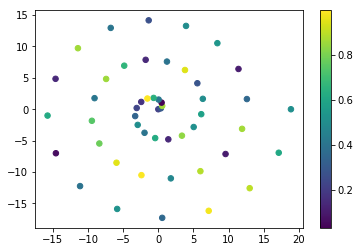

In [5]:
theta = np.linspace(0,6*np.pi,50) # 50 steps from 0 to 6 PI
size = 30*np.ones(50) # array with 50 values set to 30
z = np.random.rand(50) # array with 50 random values in [0,1]
x = theta*np.cos(theta)
y = theta*np.sin(theta)
plt.scatter(x,y,size,z)
plt.colorbar() 

# Change Colormap

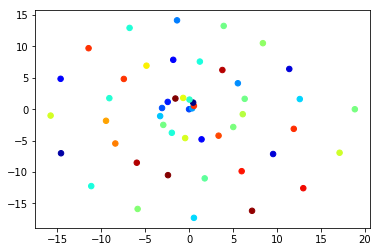

In [6]:
plt.scatter(x,y,size,z,cmap='jet')

[colormaps](http://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps) in matplotlib documentation.

# Multiple Figures

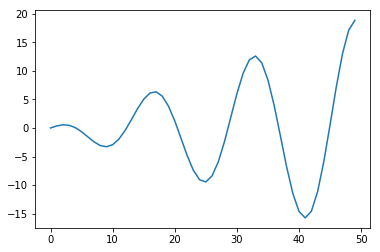

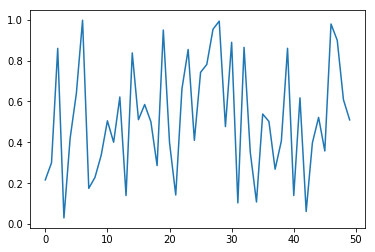

In [7]:
plt.figure()
plt.plot(x)
plt.figure()
plt.plot(z)

# Multiple Plots Using `subplot`

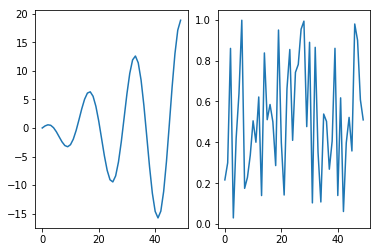

In [8]:
plt.subplot(1,2,1) # 1 row 1, 2 columns, active plot number 1
plt.plot(x)
plt.subplot(1,2,2) # 1 row 1, 2 columns, active plot number 2
plt.plot(z)

# Legends
 - Legends labels with plot

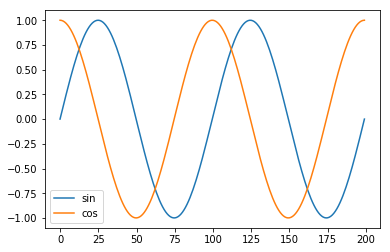

In [9]:
theta =np.linspace(0,4*np.pi,200)
plt.plot(np.sin(theta), label='sin')
plt.plot(np.cos(theta), label='cos')
plt.legend()

- Labelling with `legend`

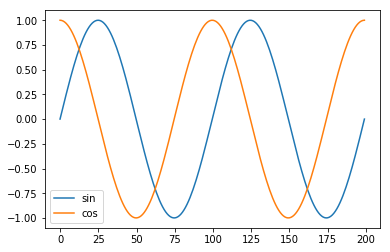

In [10]:
plt.plot(np.sin(theta))
plt.plot(np.cos(theta))
plt.legend(['sin','cos'])

# Titles and Axis Labels

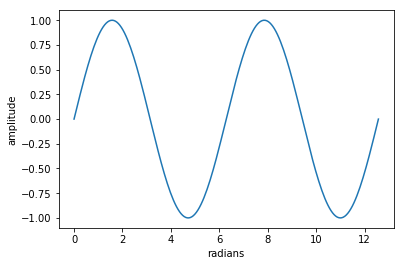

In [11]:
plt.plot(theta,np.sin(theta))
plt.xlabel('radians')
plt.ylabel('amplitude')

# Plot Grid and Save to File

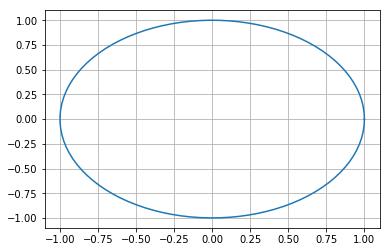

In [12]:
theta = np.linspace(0,2*np.pi,100)
plt.plot(np.cos(theta),np.sin(theta))
plt.grid()
plt.savefig('circle.png')

In [13]:
!ls *.png

circle.png        delicate_arch.png my_plots.png


# Histogram 

(array([   2.,   13.,   45.,  101.,  197.,  240.,  218.,  120.,   48.,   16.]),
 array([-3.41762377, -2.80677598, -2.19592819, -1.5850804 , -0.97423261,
        -0.36338482,  0.24746297,  0.85831076,  1.46915855,  2.08000634,
         2.69085414]),
 <a list of 10 Patch objects>)

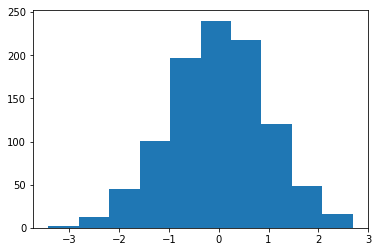

In [17]:
from numpy.random import randn
plt.hist(randn(1000))

Change the number of bins and supress display of returned array with ;


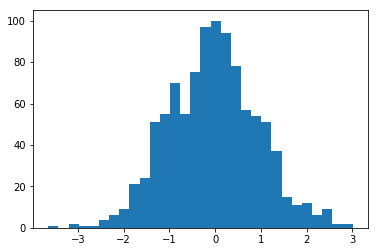

In [18]:
plt.hist(randn(1000), 30);

# Image Display

Get the ascent image from scipy:


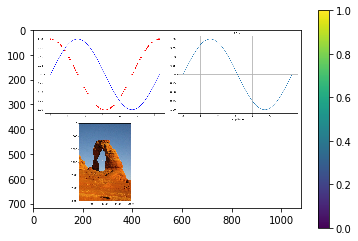

In [19]:
img = plt.imread("my_plots.png")
plt.imshow(img)
plt.colorbar()

# Exercice

Recreate the image my_plots.png using the *delicate_arch.png* file.

# More Examples and References
- Simple examples with increasing difficulty https://matplotlib.org/examples/index.html
- Gallery https://matplotlib.org/gallery.html
- A [matplotlib tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb), part of the [Lectures on Scientific Computing with Python](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/tree/master) by [J.R. Johansson](https://github.com/jrjohansson).
- [NumPy Beginner | SciPy 2016 Tutorial | Alexandre Chabot LeClerc](https://youtu.be/gtejJ3RCddE)
- [A good matplotlib tutorial](http://www.loria.fr/~rougier/teaching/matplotlib) by Nicolas Rougier from LORIA.

In [ ]:
# Bokeh
